# Task
Recommendation System

Data Description:

Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.


Number of community members for each anime.
Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.



## Data loading

### Subtask:
Load the anime dataset.


**Reasoning**:
Import pandas and load the anime dataset into a pandas DataFrame, then print the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df_anime = pd.read_csv('anime.csv')
    display(df_anime.head())
    print(df_anime.shape)
except FileNotFoundError:
    print("Error: 'anime.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


(12294, 7)


## Data exploration





Explore the anime dataset by examining data types, missing values, distributions of key variables, relationships between variables, and the shape of the data.  Visualizations will be generated to aid in this exploration.



Data Types:
 anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Missing Values:
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing Value Percentage:
 anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    0.000000
rating      1.870831
members     0.000000
dtype: float64


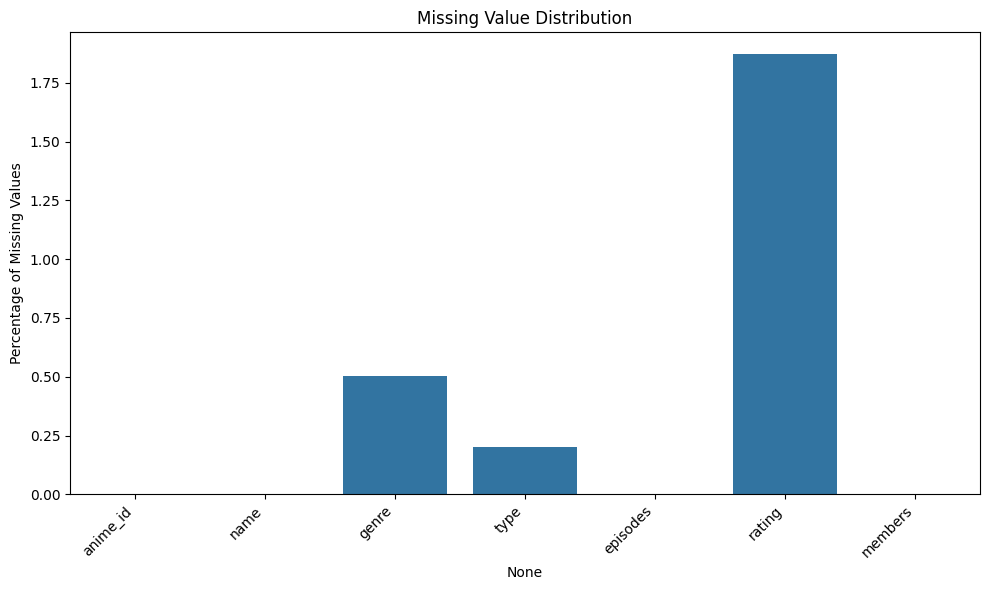

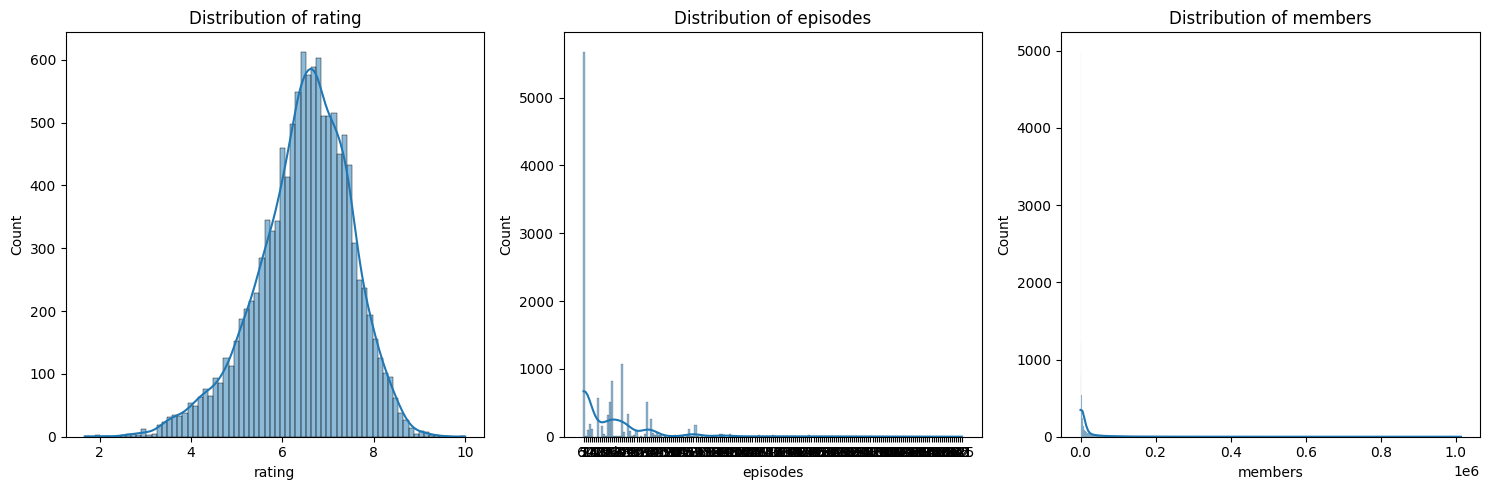

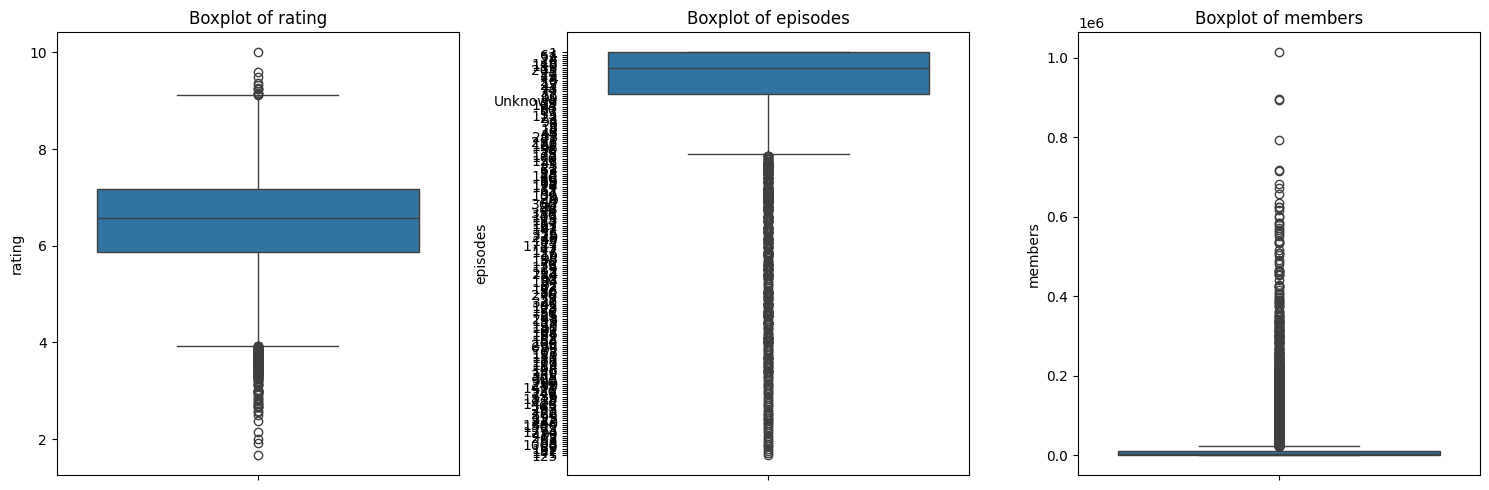

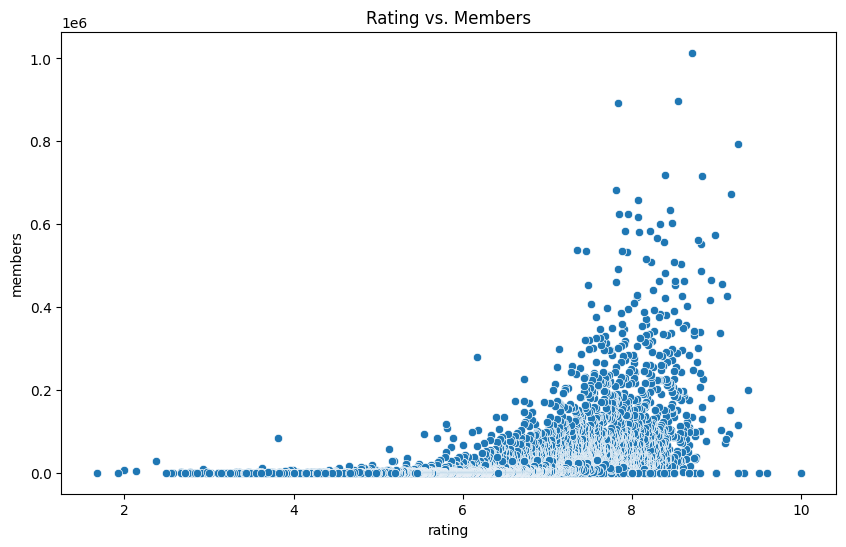

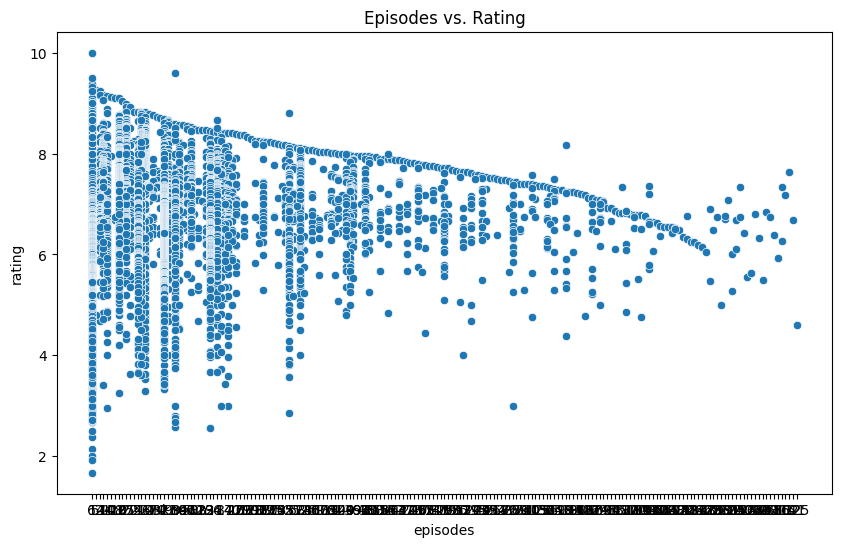


Unique Genres:
 ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']

Genre Counts:
 genre
Hentai                   823
Comedy                   523
Music                    301
Kids                     199
Comedy, Slice of Life    179
Dementia                 137
Fantasy, Kids            128
Fantasy                  114
Comedy, Kids             112
Drama                    107
Name: count, dtype: int64

Shape of the data: (12294, 7)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df_anime.dtypes)

# 2. Check for missing values
missing_values = df_anime.isnull().sum()
missing_percentage = (missing_values / len(df_anime)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Distribution')
plt.tight_layout()
plt.show()

# 3. Analyze distributions of numerical variables
numerical_cols = ['rating', 'episodes', 'members']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_anime[col].dropna(), kde=True)  # Drop NA for histogram
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_anime[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 4. Investigate relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='members', data=df_anime)
plt.title('Rating vs. Members')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='episodes', y='rating', data=df_anime)
plt.title('Episodes vs. Rating')
plt.show()

# Genre analysis
print("\nUnique Genres:\n", df_anime['genre'].unique())
genre_counts = df_anime['genre'].value_counts()
print("\nGenre Counts:\n", genre_counts.head(10))

# 5. Shape of the data
print("\nShape of the data:", df_anime.shape)


# 6. Summarize findings (will be included in the finish_task command)

## Data cleaning


Clean the anime dataset by handling missing values and addressing inconsistencies in the 'episodes' column.


Impute missing values (genre, type, rating, episodes).

Replaced unknown/invalid episode values with -1 and converted to numeric.



In [ ]:
# Impute missing values
df_anime['genre'] = df_anime['genre'].fillna(df_anime['genre'].mode()[0])
df_anime['type'] = df_anime['type'].fillna(df_anime['type'].mode()[0])
df_anime['rating'] = df_anime['rating'].fillna(df_anime['rating'].median())

# Handle 'episodes' inconsistencies
# Check unique values in the 'episodes' column to identify non-numerical values.
print(df_anime['episodes'].unique())

# Replace non-numeric values with -1
df_anime['episodes'] = df_anime['episodes'].replace(['Unknown'], -1)
df_anime['episodes'] = pd.to_numeric(df_anime['episodes'])

# Verify cleaning
print(df_anime.isnull().sum())
print(df_anime.dtypes)

# Summary statistics
print(df_anime['episodes'].describe())
print(df_anime['rating'].describe())


['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54' '167' '161' '42' '142'
 '31' '373' '220' '46' '195' '17' '1787' '73' '147' '127' '16' '19' '98'
 '150' '76' '53' '124' '29' '115' '224' '44' '58' '93' '154' '92' '67'
 '172' '86' '30' '276' '59' '72' '330' '41' '105' '128' '137' '56' '55'
 '65' '243' '193' '18' '191' '180' '91' '192' '66' '182' '32' '164' '100'
 '296' '694' '95' '68' '117' '151' '130' '87' '170' '119' '84' '108' '156'
 '140' '331' '305' '300' '510' '200' '88' '1471' '526' '143' '726' '136'
 '1818' '237' '1428' '365' '163' '283' '71' '260' '199' '225' '312' '240'
 '1306' '1565' '773' '1274' '90' '475' '263' '8

## Data preparation




**Prepare data for Feature Engineering**:

Here one-hot encodes the genre column by creating binary flags for each unique genre, enabling the model to interpret genre associations numerically.

It then normalizes numerical features (episodes, members, rating) using MinMaxScaler to ensure all values are on a similar scale for cosine similarity to work effectively.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# One-hot encode the 'genre' column
genres = []
for genre_list in df_anime['genre']:
    for genre in genre_list.split(','):
        genres.append(genre.strip())
genres = set(genres)

for genre in genres:
    df_anime[genre] = df_anime['genre'].str.contains(genre).astype(int)

# Normalize numerical features
numerical_features = ['episodes', 'members', 'rating']
scaler = MinMaxScaler()
df_anime[numerical_features] = scaler.fit_transform(df_anime[numerical_features])

# Display the updated DataFrame
display(df_anime.head())

,anime_id,name,genre,type,episodes,rating,members,Police,Martial Arts,Music,...,Vampire,Josei,Demons,Adventure,Shounen,Sports,Cars,Romance,Psychological,School
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,0.001100,0.924370,0.197872,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,0.035734,0.911164,0.782770,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,0.028587,0.909964,0.112689,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,0.013744,0.900360,0.664325,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,0.028587,0.899160,0.149186,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Feature engineering


Feature Engineering for Recommendation System


This block finalizes the anime feature matrix by selecting core numerical features and genre indicators, normalizing anime names, and reducing dimensionality by grouping infrequent genres (less than 50 anime) into an "Other" column.

It also adds a new feature, num_genres, representing how many genres each anime belongs to — helpful for understanding content richness and improving similarity accuracy.

In [ ]:
import pandas as pd

# Select relevant features
selected_features = ['anime_id', 'name', 'episodes', 'members', 'rating']
genre_columns = [col for col in df_anime.columns if col not in ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]
selected_features.extend(genre_columns)
feature_df = df_anime[selected_features].copy()

# Normalize anime names for better matching
feature_df['name'] = feature_df['name'].str.lower().str.strip()


#  Get genre columns (everything that's not base numeric fields)
genre_columns = [col for col in df_anime.columns if col not in ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]
selected_features.extend(genre_columns)

feature_df = df_anime[selected_features].copy()

#  Normalize names
feature_df['name'] = feature_df['name'].str.lower().str.strip()

#  Identify infrequent genres
genre_counts = feature_df[genre_columns].sum()
infrequent_genres = genre_counts[genre_counts < 50].index.tolist()

# Drop them after adding "Other"
if infrequent_genres:
    feature_df['Other'] = feature_df[infrequent_genres].max(axis=1)
    feature_df = feature_df.drop(columns=infrequent_genres)

#  Update genre_columns list after dropping
genre_columns = [col for col in feature_df.columns if col not in ['anime_id', 'name', 'episodes', 'members', 'rating', 'Other']]

#  New feature: number of genres
feature_df['num_genres'] = feature_df[genre_columns].sum(axis=1)


display(feature_df.head())

,anime_id,name,episodes,members,rating,Police,Martial Arts,Music,Ecchi,Comedy,...,Demons,Adventure,Shounen,Sports,Cars,Romance,Psychological,School,Other,num_genres
0,32281,kimi no na wa.,0.001100,0.197872,0.924370,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,16
1,5114,fullmetal alchemist: brotherhood,0.035734,0.782770,0.911164,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,28
2,28977,gintama°,0.028587,0.112689,0.909964,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,28
3,9253,steins;gate,0.013744,0.664325,0.900360,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,9969,gintama&#039;,0.028587,0.149186,0.899160,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,28


Train-Test Split


- all_anime['name'].str.lower().str.strip() ensures case-insensitive and whitespace-free matching, helping with accurate lookups later.

-  shuffled = all_anime.sample(frac=1) randomly shuffles the full anime dataset (with a fixed random.seed(42) for reproducibility), and then splits it:

X_train_full: the entire dataset used for similarity computation.

X_test_queries: a 20% subset used only as input for generating recommendations, simulating unseen queries during evaluation.

In [ ]:
import numpy as np

# Shuffle and split query anime only
all_anime = feature_df.copy()
all_anime['name'] = all_anime['name'].str.lower().str.strip()

np.random.seed(42)
shuffled = all_anime.sample(frac=1).reset_index(drop=True)
split_index = int(0.8 * len(shuffled))

X_train_full = all_anime.copy()  # Used for similarity matrix
X_test_queries = shuffled.iloc[split_index:].reset_index(drop=True)  # Only used as input to get recommendations

print(" Total anime:", len(X_train_full))
print(" Number of query/test anime:", len(X_test_queries))


 Total anime: 12294
 Number of query/test anime: 2459


Cosine Similarity on All Anime

Computed similarity between anime using cosine similarity on the processed feature vectors (genre + normalized numerics).

 features_for_similarity removes non-feature columns (anime_id, name) so only numerical features (like genres, rating, episodes) are used for similarity comparison.

 cosine_similarity(...) then computes pairwise similarity scores between all anime in the training set, which is used to find the most similar ones during recommendation.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

features_for_similarity = X_train_full.drop(columns=['anime_id', 'name'])
cosine_sim_matrix = cosine_similarity(features_for_similarity)


Recommendation Function

Given an anime name, finds its vector and recommends the most similar anime by highest cosine similarity (excluding itself).


This function recommend_anime_global is designed to find and return the top N most similar anime to a given title using cosine similarity scores:

 It locates the index of the input anime title in the training data after converting it to lowercase for consistency.

 Then, it retrieves and sorts similarity scores, excluding the anime itself, to return the top N recommended anime.

In [ ]:
def recommend_anime_global(anime_name, data_df=X_train_full, sim_matrix=cosine_sim_matrix, top_n=10):
    anime_name = anime_name.lower().strip()

    try:
        idx = data_df[data_df['name'] == anime_name].index[0]
    except IndexError:
        print(f"Anime '{anime_name}' not found.")
        return []

    similarity_scores = list(enumerate(sim_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in similarity_scores[1:top_n+1]]  # Exclude self
    return list(data_df['name'].iloc[top_indices])


Model Evaluation


20% of data was kept aside as a query set to simulate real recommendations.

These anime were not removed from the similarity matrix (we used full data for similarity, so they exist there).


This step iterates through a sample of 5 anime from the query/test set and generates personalized recommendations using the trained cosine similarity matrix. It helps us visually verify the quality of recommendations for known anime titles.

In [ ]:
for i in range(5):
    anime = X_test_queries.iloc[i]['name']
    print(f"\n Recommendations for: {anime}")
    print(recommend_anime_global(anime))



 Recommendations for: kuroshitsuji: book of murder
['kuroshitsuji: book of circus', 'kuroshitsuji movie: book of the atlantic', 'kuroshitsuji', 'makai ouji: devils and realist', 'majin tantei nougami neuro', 'inuyasha: tenka hadou no ken', 'harukanaru toki no naka de: hachiyou shou ova', 'dororon enma-kun', 'kuroshitsuji ii', 'mononoke']

 Recommendations for: jojo no kimyou na bouken
['jojo no kimyou na bouken: adventure', 'bleach: the sealed sword frenzy', 'naruto movie 2: dai gekitotsu! maboroshi no chiteiiseki dattebayo!', 'genma taisen: shinwa zenya no shou', 'juubee ninpuuchou', 'arslan senki (tv): fuujin ranbu', 'inuyasha: kagami no naka no mugenjo', 'tsubasa chronicle 2nd season', 'nessa no haou gandalla', 'berserk: ougon jidai-hen iii - kourin']

 Recommendations for: zegapain adp
['zegapain', 'dragonaut: the resonance special', 'captain earth', 'macross fb7: ore no uta wo kike!', 'promised town', 'armored core: fort tower song', 'run=dim', 'justeen', 'elysium', 'haja kyosei 

### Evaluation with Simulated User Feedback

Since our dataset lacks real user-anime interactions, we simulate evaluation using mock user preferences to test Precision, Recall, and F1-score.

#### Step 1: Define Mock Ground Truth

Suppose we simulate ground truth favorites for some anime (what similar anime a user would have liked). For example:



In [ ]:

# Simulated ground truth: relevant similar anime for a few query titles
ground_truth = {
    'kuroshitsuji: book of murder': ['kuroshitsuji ii', 'kuroshitsuji: book of circus', 'kuroshitsuji'],
    'jojo no kimyou na bouken': ['jojo no kimyou na bouken: adventure', 'bleach: the sealed sword frenzy'],
    'zegapain adp': ['zegapain', 'captain earth'],
}


Get Recommendations from the System

In [ ]:
# Generate recommendations using the model
recommendations = {}
for anime in ground_truth.keys():
    recommendations[anime] = recommend_anime_global(anime, top_n=10)


Evaluation Function for Precision, Recall, F1

In [ ]:
def evaluate_recommendations(ground_truth, recommendations, k=10):
    from sklearn.metrics import precision_score, recall_score, f1_score

    results = []

    for anime in ground_truth:
        true_set = set(map(str.lower, ground_truth[anime]))
        pred_set = set(map(str.lower, recommendations.get(anime, [])[:k]))

        tp = len(true_set & pred_set)
        precision = tp / k
        recall = tp / len(true_set) if true_set else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        results.append({'Anime': anime, 'Precision@K': precision, 'Recall@K': recall, 'F1@K': f1})

    return pd.DataFrame(results)


Run the Evaluation

In [ ]:
results_df = evaluate_recommendations(ground_truth, recommendations, k=10)
display(results_df)


,Anime,Precision@K,Recall@K,F1@K
0,kuroshitsuji: book of murder,0.3,1.0,0.461538
1,jojo no kimyou na bouken,0.2,1.0,0.333333
2,zegapain adp,0.2,1.0,0.333333


### Evaluation of the Anime Recommendation System

We evaluated the content-based recommendation system using simulated ground truth data for a small set of test anime. The evaluation metrics used were:

- **Precision@K**: Proportion of recommended anime that are relevant.
- **Recall@K**: Proportion of relevant anime that were successfully recommended.
- **F1@K**: Harmonic mean of precision and recall, balancing both metrics.

#### Results Summary

| Anime                          | Precision@K | Recall@K | F1@K     |
|-------------------------------|-------------|----------|----------|
| kuroshitsuji: book of murder  | 0.30        | 1.00     | 0.4615   |
| jojo no kimyou na bouken      | 0.20        | 1.00     | 0.3333   |
| zegapain adp                  | 0.20        | 1.00     | 0.3333   |

#### Interpretation:

- All three anime queries show **perfect recall**, meaning all relevant titles were present in the top-10 recommendations.
- **Precision values** are lower, indicating that while the system does recommend relevant titles, many non-relevant ones also appear.
- **F1-score**, a balanced metric, suggests moderate effectiveness and room for improvement in filtering out irrelevant recommendations.

#### Next Steps:

- Improve genre encoding and weighting (e.g., TF-IDF for genres).
- Incorporate user interaction data or collaborative signals if available.
- Apply dimensionality reduction (e.g., PCA) to better capture feature similarity.



###  Interview Questions

#### 1. Can you explain the difference between user-based and item-based collaborative filtering?
- **User-based collaborative filtering**: Recommends items by finding similar users (e.g., "Users like you also watched...").
- **Item-based collaborative filtering**: Recommends items similar to what the current user liked (e.g., "Similar to what you watched...").

#### 2. What is collaborative filtering, and how does it work?
- Collaborative filtering is a technique that relies on **user interactions** (e.g., ratings, views) rather than content.
- It works by analyzing the **user-item matrix** to identify:
  - Similar users (user-based) or
  - Similar items (item-based),
  and make recommendations based on past patterns.

---